# Email Spam Detection

## Import necessary libraries

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, PrecisionRecallDisplay, RocCurveDisplay



## load data

In [37]:
df = pd.read_csv("emails.csv")

In [36]:
df

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,Email 5168,2,2,2,3,0,0,32,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,Email 5169,35,27,11,2,6,5,151,4,3,...,0,0,0,0,0,0,0,1,0,0
5169,Email 5170,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,1
5170,Email 5171,2,7,1,0,2,1,28,2,0,...,0,0,0,0,0,0,0,1,0,1


In [12]:
df.isnull().sum()

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3000 entries, to to Prediction
dtypes: int64(3000)
memory usage: 118.4 MB


In [19]:
df=df.iloc[:,1:]

In [20]:
df.nunique()

ect            90
and            53
for            42
of             59
a             372
             ... 
military        4
allowing        3
ff             23
dry             4
Prediction      2
Length: 2999, dtype: int64

C:\Users\gdk14\AppData\Local\Temp\ipykernel_18300\1842995555.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Prediction)


<Axes: xlabel='Prediction', ylabel='Density'>

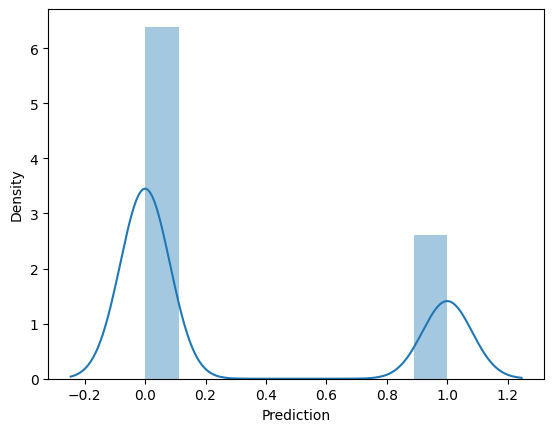

In [21]:
sns.distplot(df.Prediction)

In [49]:
x = df.iloc[:, :3000].values
x

array([['Email 1', 0, 0, ..., 0, 0, 0],
       ['Email 2', 8, 13, ..., 0, 0, 1],
       ['Email 3', 0, 0, ..., 0, 0, 0],
       ...,
       ['Email 5170', 0, 0, ..., 0, 0, 0],
       ['Email 5171', 2, 7, ..., 0, 0, 1],
       ['Email 5172', 22, 24, ..., 0, 0, 0]], dtype=object)

In [23]:
y = df.iloc[:, -1].values
y

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

## Split data and make a function

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

In [27]:
def perform(y_pred):
    print("Precision : ", precision_score(y_test, y_pred))
    print("Recall : ", recall_score(y_test, y_pred))
    print("Accuracy Score : ", accuracy_score(y_test, y_pred))
    print("F1 Score : ", f1_score(y_test, y_pred))
    print("\n", confusion_matrix(y_test, y_pred))
    print("")
    
    cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_pred), display_labels=['Spam', 'Not Spam'] )
    cm_display.plot()
    plt.show()

## Gaussian Naive Bayes

In [28]:
model_nb = GaussianNB()
model_nb.fit(x_train, y_train)

GaussianNB()

In [29]:
y_pred_nb = model_nb.predict(x_test)

Precision :  0.9955947136563876
Recall :  0.9955947136563876
Accuracy Score :  0.9974226804123711
F1 Score :  0.9955947136563876

 [[1096    2]
 [   2  452]]



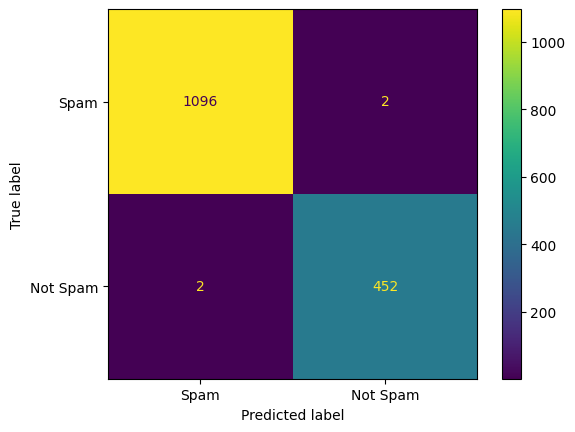

In [40]:
perform(y_pred_nb)

## Multinomial Naive Bayes

In [41]:
model_mnb = MultinomialNB()
model_mnb.fit(x_train, y_train)

MultinomialNB()

Precision :  0.877906976744186
Recall :  0.9977973568281938
Accuracy Score :  0.9587628865979382
F1 Score :  0.9340206185567012

 [[1035   63]
 [   1  453]]



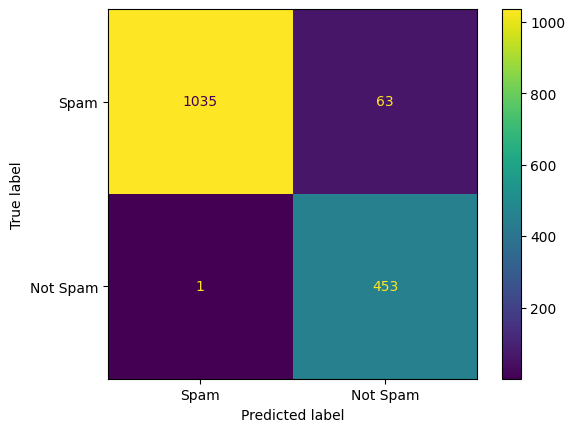

In [43]:
y_pred_mnb = model_mnb.predict(x_test)
perform(y_pred_mnb)

## Decision Tree Classifier

In [46]:
model_dt = DecisionTreeClassifier()
model_dt.fit(x_train, y_train)


DecisionTreeClassifier()

Precision :  1.0
Recall :  1.0
Accuracy Score :  1.0
F1 Score :  1.0

 [[1098    0]
 [   0  454]]



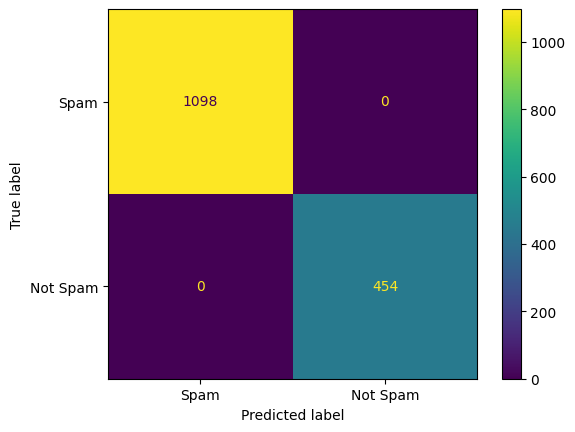

In [47]:
y_pred_dt = model_dt.predict(x_test)
perform(y_pred_dt)

## Random Forest Classifier

Precision :  1.0
Recall :  0.9933920704845814
Accuracy Score :  0.9980670103092784
F1 Score :  0.9966850828729282

 [[1098    0]
 [   3  451]]



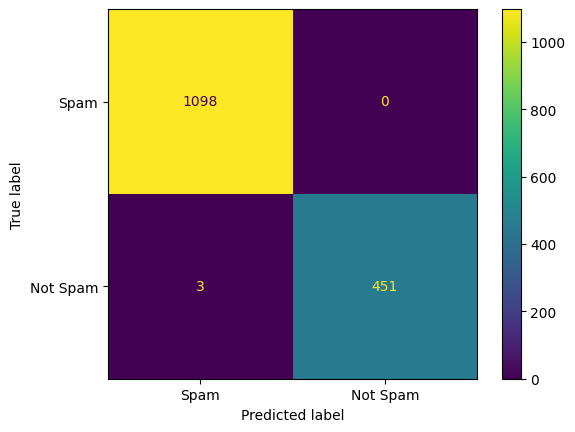

In [45]:
model_rf = RandomForestClassifier()
model_rf.fit(x_train, y_train)
y_pred_rf = model_rf.predict(x_test)
perform(y_pred_rf)

## Conclusion
Here the best accuracy and precision we are getting is of decesion tree classifier that is of 100% accuracy and precision